# Intro

In [80]:
# imports required to run the code.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import sklearn
import autograd.numpy as np_
import numpy as np
from autograd import grad

In [81]:
# preparing dataset.

dfo = pd.read_csv('healthcare-dataset-stroke-data.csv')
dfo = dfo.fillna(0)

# ---------------------------------------- #

dfo.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [82]:
# preparing dataset.

dfo = pd.read_csv('healthcare-dataset-stroke-data.csv')
dfo = dfo.fillna(0)

dfo = dfo.sort_values(by=['bmi'], ascending=True)
dfo = dfo.reset_index(drop = True)

# ---------------------------------------- #

df = pd.get_dummies(dfo) # converte dados não numéricos.
df = df.drop(columns=['gender_Other', 'gender_Male']) # remoção de dados redundantes.
df.rename(columns={"gender_Female": "gender"}, inplace = True)

# ---------------------------------------- #
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,34248,50.0,1,0,81.96,0.0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,29224,30.0,0,0,91.23,0.0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,49894,78.0,1,1,206.53,0.0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,37526,68.0,1,1,233.30,0.0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,29095,71.0,1,0,93.60,0.0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [83]:
df['stroke'].value_counts()

C:\Users\pache\AppData\Local\Temp\ipykernel_2200\1291571582.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfo = dfo1.append(dfo2)


-1    153
 1    121
Name: stroke, dtype: int64

# Amostragem

O primeiro passo para garantir uma análise mais próxima da realidade é a remoção de parcialidades, no nosso caso, identificamos que nossos dados eram majoritariamente de pessoas que não sofreram de AVC's, portanto havia um viés tendendo a essa direção o que poderia reduzir a credibilidade de nosso algoritmo.

Para contornar tal problema, decidimos limitar nosso tamanho de amostra para que houvesse uma relação mais próxima de 1 para 1 entre casos em que um individuo sofreu ou não um AVC. 

In [ ]:
# normalizing dataframe.

filtery = (df['stroke'] == 0)
dfo1 = df[filtery]

dfo1 = dfo1.iloc[:300]

filtery = (df['stroke'] == 1)
dfo2 = df[filtery]

dfo = dfo1.append(dfo2)

# ----------------- #

# excluding more redundant data.
dfa = dfo.drop(columns=['stroke','id','ever_married_No','Residence_type_Rural','smoking_status_formerly smoked']).astype(float)

## Separando dados em teste e treino

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfa, dfo['stroke'], train_size=0.5)
y_train = y_train.replace(to_replace=0,value=-1)
y_test = y_test.replace(to_replace=0,value=-1)
y_train.value_counts()

In [84]:
# To Numpy
X_train,X_test,y_train,y_test = X_train.to_numpy(),X_test.to_numpy(),y_train.to_numpy(),y_test.to_numpy()

# Métodos e funções

- acurracy

- eqm

In [85]:
# ---------------------------------------- #

def predict( w, b, pontos ): # Uses data obtained to extrapolate real value.
    est = w.T @ pontos + b
    return est


def accuracy(y_test, y_est): # Compares extrapolated data with real data.
    return np.mean(np.sign(y_test) == np.sign(y_est))

def eqm( parametros ): # 
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

# ---------------------------------------- #

# Teste de acurácia

In [86]:
# Generating data for accuracy test.
# Current values are going to take a while.

results = []
for _ in range(10):
    g = grad(eqm)

    pontos = X_train.T
    alvos = (y_train).astype(float)

    w = np.random.randn( pontos.shape[0],1)
    b = 0.0
    alpha = 0.000001

    for n in range(10000):
        grad_ = g( (w, b, pontos, alvos) )
        w -= alpha*grad_[0]
        b -= alpha*grad_[1]

    y_pred = (predict( w, b, X_test.T )).reshape((y_test.shape))

    results.append(accuracy(y_test, y_pred))

In [87]:
# prints accuracy data.

print(np.array(results).mean())
print(np.array(results).std())

0.5214545454545454
0.1703992395125233


Com base nos parametros normalisados, podemos afirmar que nosso classificador tem um funcionamento teórico bom - acertando em media 60% das vezes.

In [88]:
# Generating prediction values.

g = grad(eqm)

pontos = X_train.T
alvos = (y_train).astype(float)

w = np.random.randn( pontos.shape[0],1)
b = 0.0
alpha = 0.000001
print(w)
for n in range(1000):
    grad_ = g( (w, b, pontos, alvos) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

y_pred = (predict( w, b, X_test.T )).reshape((y_test.shape))

[[-0.51104691]
 [-0.06401351]
 [-0.51028502]
 [ 0.65065428]
 [ 0.78971596]
 [-0.36955717]
 [ 0.61411621]
 [-0.8484054 ]
 [ 1.6431953 ]
 [-0.15231286]
 [ 1.0827662 ]
 [-0.79354761]
 [-0.08753593]
 [ 0.40410408]
 [-0.1983249 ]
 [-0.63086927]]


# Visualizando os fatores de relevância

In [89]:
from collections import OrderedDict

columns = list(dfa.columns)
res = {columns[i]: float(w[i]) for i in range(len(w))}
sorted(res.items(), key=lambda t: t[1], reverse=True)

[('work_type_Never_worked', 1.6430892956841514),
 ('work_type_Self-employed', 1.0846132649078304),
 ('ever_married_Yes', 0.6174179301430122),
 ('bmi', 0.5599874474240157),
 ('smoking_status_Unknown', 0.3980159657175057),
 ('avg_glucose_level', 0.017808940459567844),
 ('hypertension', -0.06271355211222357),
 ('Residence_type_Urban', -0.0898364979055192),
 ('work_type_Private', -0.1511573988216175),
 ('smoking_status_never smoked', -0.1971997785169696),
 ('age', -0.2183635940023115),
 ('gender', -0.3709667646294697),
 ('heart_disease', -0.5099918444660753),
 ('smoking_status_smokes', -0.6303027602135944),
 ('work_type_children', -0.8009568454457687),
 ('work_type_Govt_job', -0.8470793295995909)]

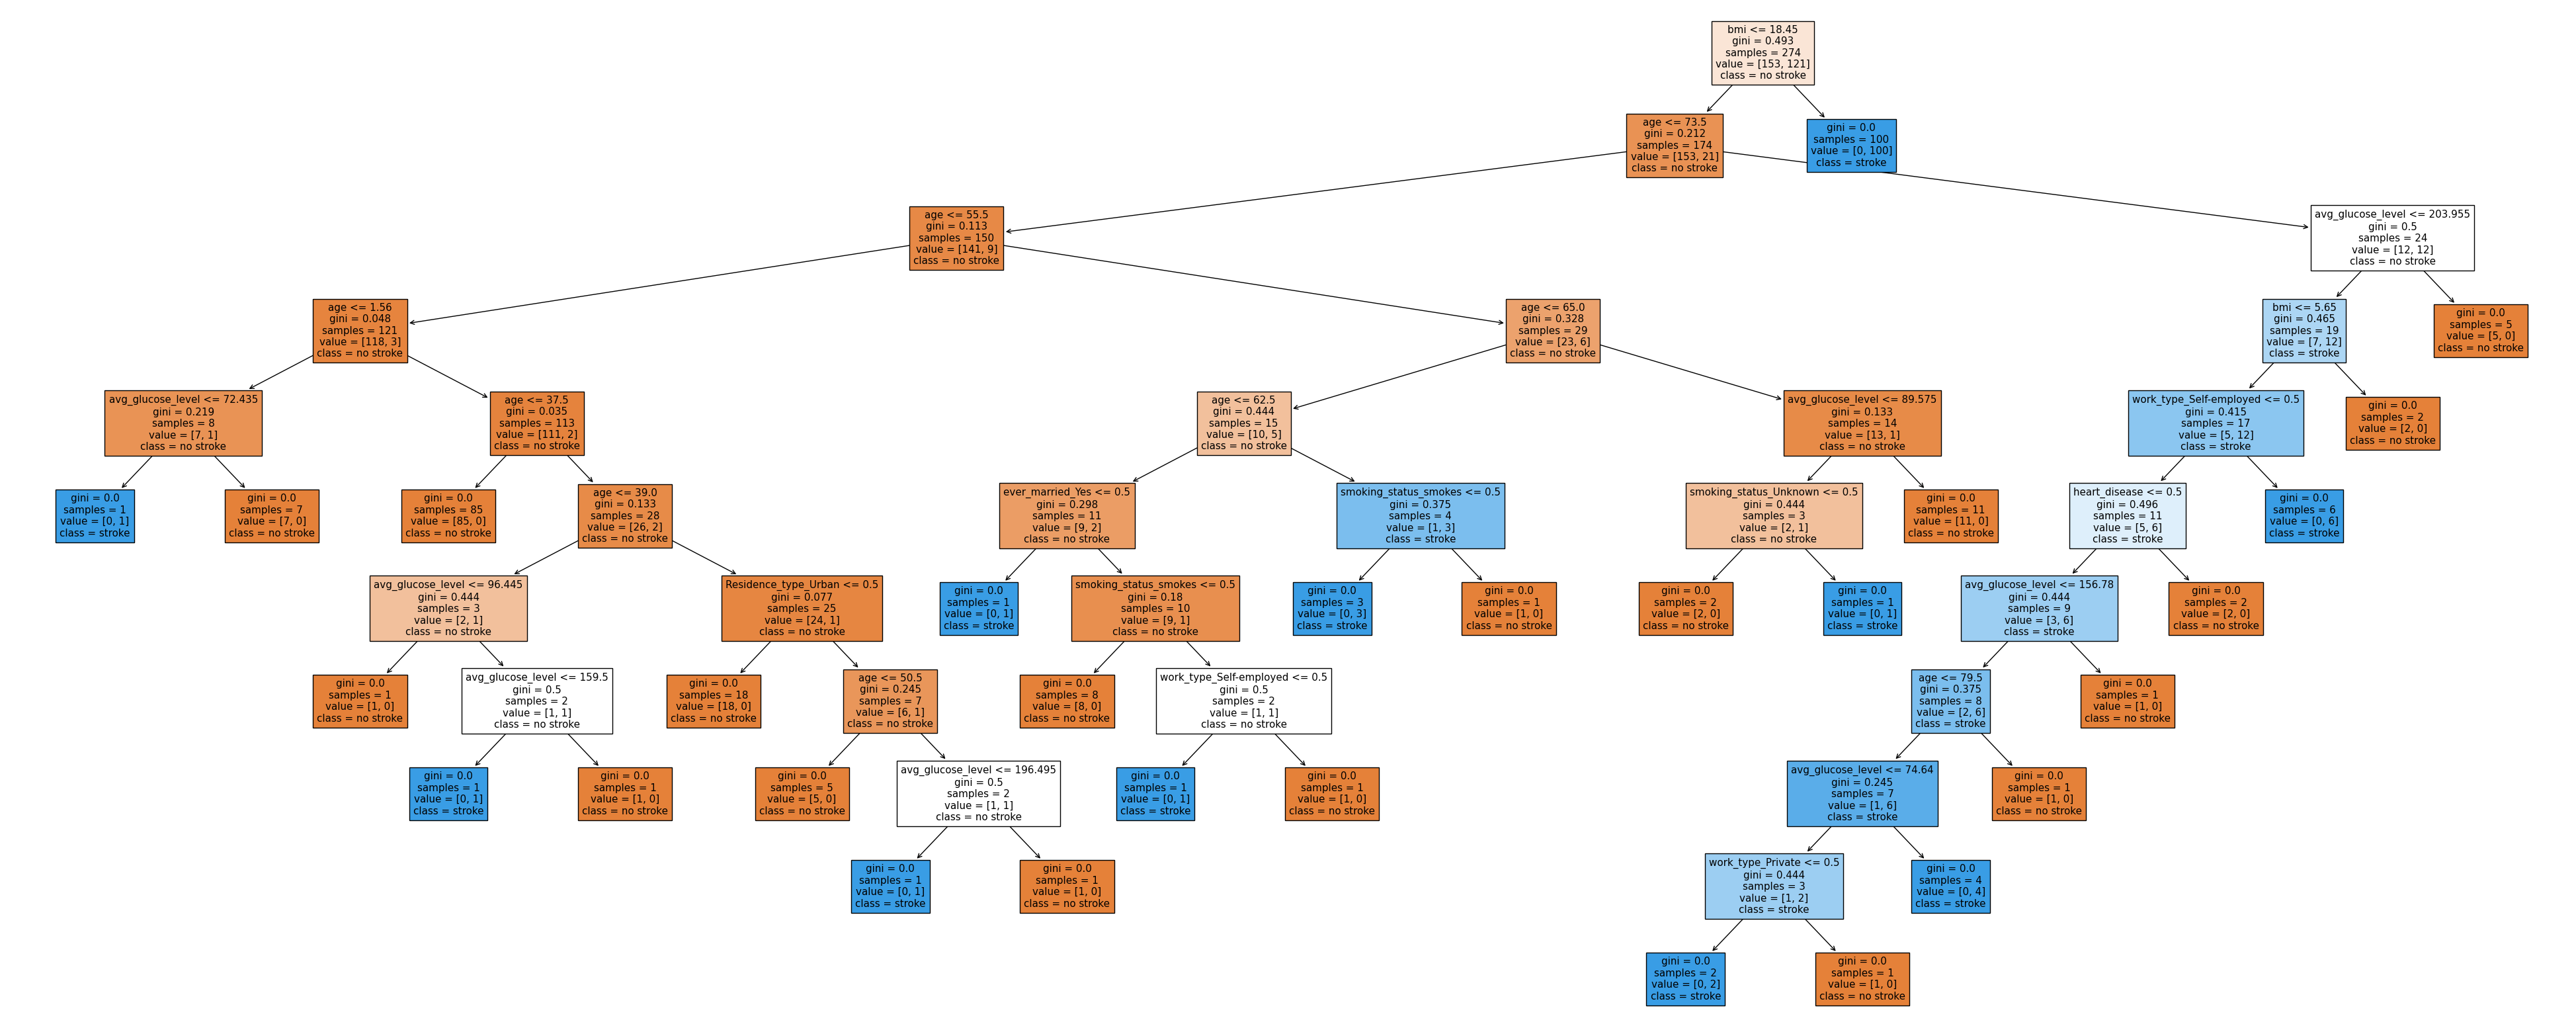

In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(50, 20))
plot_tree(model, feature_names=dfa.columns, class_names=['no stroke', 'stroke'], filled=True, ax=ax)
plt.show()